In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")

In [4]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [6]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [8]:
df.shape

(397, 6)

In [9]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [18]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [20]:
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

skewness of data is at acceptable level

In [21]:
df['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

we can see there is huge difference between male -female ratio

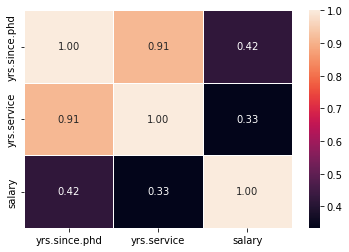

In [24]:
#correlation graph
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt='0.2f')
plt.show()

Text(0.5, 1.0, 'Years since PhD vs Years Service')

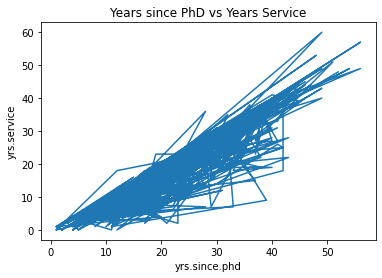

In [29]:
plt.plot(df['yrs.since.phd'], df['yrs.service'])
plt.xlabel('yrs.since.phd')
plt.ylabel('yrs.service')
plt.title('Years since PhD vs Years Service') 

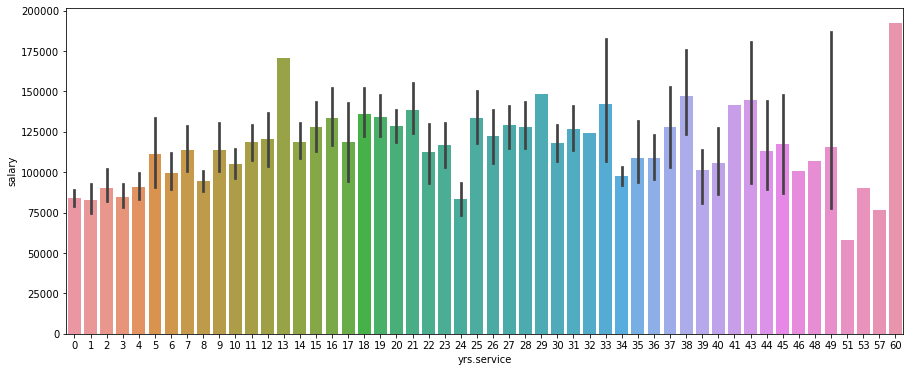

In [31]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'yrs.service',y='salary',data = df)

plt.show()

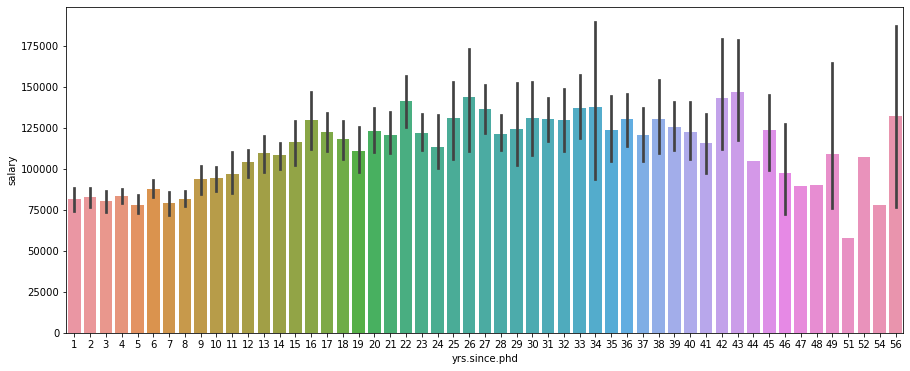

In [36]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'yrs.since.phd',y='salary',data = df)
plt.show()

<AxesSubplot:xlabel='sex', ylabel='salary'>

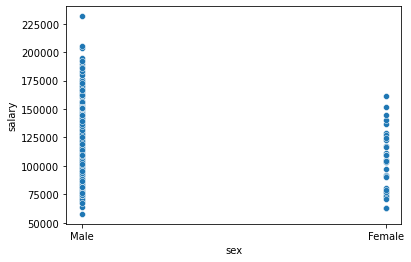

In [39]:
sns.scatterplot(x='sex', y='salary', data=df)

<AxesSubplot:xlabel='sex', ylabel='yrs.since.phd'>

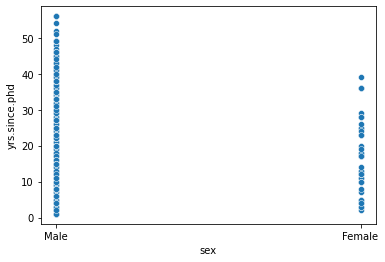

In [41]:
sns.scatterplot(x='sex', y='yrs.since.phd', data=df)

<AxesSubplot:xlabel='sex', ylabel='yrs.service'>

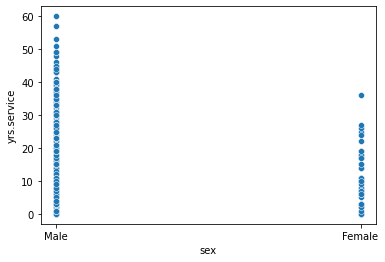

In [42]:
sns.scatterplot(x='sex', y='yrs.service', data=df)

In [45]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [47]:
df['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [48]:
df['discipline'].unique()

array(['B', 'A'], dtype=object)

In [49]:
df['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [50]:
df['discipline'].value_counts()

B    216
A    181
Name: discipline, dtype: int64

<AxesSubplot:xlabel='rank', ylabel='salary'>

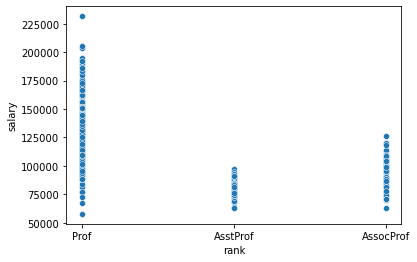

In [51]:
sns.scatterplot(x='rank', y='salary', data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

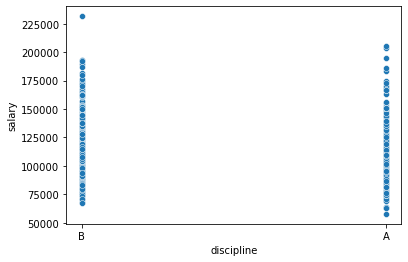

In [52]:
sns.scatterplot(x='discipline', y='salary', data=df)

this shows that both discipline follows same path in salary 

<AxesSubplot:xlabel='rank', ylabel='yrs.service'>

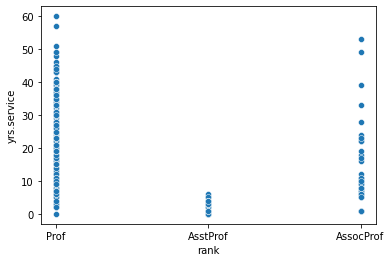

In [53]:
sns.scatterplot(x='rank', y='yrs.service', data=df)

<AxesSubplot:xlabel='rank', ylabel='discipline'>

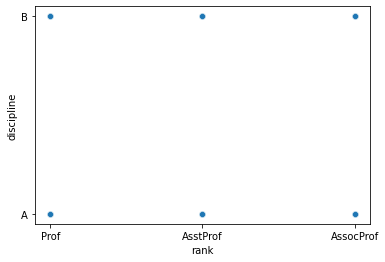

In [69]:
sns.scatterplot(x='rank', y='discipline', data=df)

In [57]:
# to correlate categorical data with continuous data, we need to convert categorical data to int form

df_dummies1= pd.get_dummies(df['discipline'])

df_new = pd.concat([df, df_dummies1], axis=1)
del df_new['discipline']

In [58]:
df_new

,rank,yrs.since.phd,yrs.service,sex,salary,A,B
0,Prof,19,18,Male,139750,0,1
1,Prof,20,16,Male,173200,0,1
2,AsstProf,4,3,Male,79750,0,1
3,Prof,45,39,Male,115000,0,1
4,Prof,40,41,Male,141500,0,1
...,...,...,...,...,...,...,...
392,Prof,33,30,Male,103106,1,0
393,Prof,31,19,Male,150564,1,0
394,Prof,42,25,Male,101738,1,0
395,Prof,25,15,Male,95329,1,0


In [59]:
df_new.corr()

,yrs.since.phd,yrs.service,salary,A,B
yrs.since.phd,1.000000,0.909649,0.419231,0.218087,-0.218087
yrs.service,0.909649,1.000000,0.334745,0.164599,-0.164599
salary,0.419231,0.334745,1.000000,-0.156084,0.156084
A,0.218087,0.164599,-0.156084,1.000000,-1.000000
B,-0.218087,-0.164599,0.156084,-1.000000,1.000000


In [60]:
df_dummies2= pd.get_dummies(df['rank'])
df_new1 = pd.concat([df, df_dummies2], axis=1)
del df_new1['rank']

In [61]:
df_new1.head(5)

,discipline,yrs.since.phd,yrs.service,sex,salary,AssocProf,AsstProf,Prof
0,B,19,18,Male,139750,0,0,1
1,B,20,16,Male,173200,0,0,1
2,B,4,3,Male,79750,0,1,0
3,B,45,39,Male,115000,0,0,1
4,B,40,41,Male,141500,0,0,1


In [63]:
df_new1.corr()

,yrs.since.phd,yrs.service,salary,AssocProf,AsstProf,Prof
yrs.since.phd,1.000000,0.909649,0.419231,-0.233721,-0.602513,0.662719
yrs.service,0.909649,1.000000,0.334745,-0.191074,-0.528702,0.570572
salary,0.419231,0.334745,1.000000,-0.287378,-0.490502,0.615458
AssocProf,-0.233721,-0.191074,-0.287378,1.000000,-0.197537,-0.624702
AsstProf,-0.602513,-0.528702,-0.490502,-0.197537,1.000000,-0.642075
Prof,0.662719,0.570572,0.615458,-0.624702,-0.642075,1.000000


In [64]:
df_dummies3= pd.get_dummies(df['sex'])
df_new2 = pd.concat([df, df_dummies3], axis=1)
del df_new2['sex']

In [65]:
df_new2.head(3)

,rank,discipline,yrs.since.phd,yrs.service,salary,Female,Male
0,Prof,B,19,18,139750,0,1
1,Prof,B,20,16,173200,0,1
2,AsstProf,B,4,3,79750,0,1


In [66]:
df_new2.corr()

,yrs.since.phd,yrs.service,salary,Female,Male
yrs.since.phd,1.000000,0.909649,0.419231,-0.148788,0.148788
yrs.service,0.909649,1.000000,0.334745,-0.153740,0.153740
salary,0.419231,0.334745,1.000000,-0.138610,0.138610
Female,-0.148788,-0.153740,-0.138610,1.000000,-1.000000
Male,0.148788,0.153740,0.138610,-1.000000,1.000000


In [67]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import make_column_transformer

In [68]:
ohe=OneHotEncoder()

In [74]:
ct=make_column_transformer((ohe,['rank','discipline', 'sex',]), remainder='passthrough')#passthrough to keep other columns

In [75]:
ct.fit_transform(df)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.90000e+01,
        1.80000e+01, 1.39750e+05],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 2.00000e+01,
        1.60000e+01, 1.73200e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 4.00000e+00,
        3.00000e+00, 7.97500e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 4.20000e+01,
        2.50000e+01, 1.01738e+05],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 2.50000e+01,
        1.50000e+01, 9.53290e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 8.00000e+00,
        4.00000e+00, 8.10350e+04]])

In [73]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [82]:
import scipy.stats as stats
import itertools

In [83]:
df_anova=[["rank","salary"]]
grouped_anova=df_anova.groupby([["rank"]])
anova_results_1=stats.f_oneway(grouped_anova.get_group("Prof")["salary"],grouped_anova.get_group("AsstProf")["salary"], grouped_anova.get_group("AssocProf")["salary"])

AttributeError: 'list' object has no attribute 'groupby'

In [99]:
combined_df=pd.merge(df_new,df_new1,how='inner',left_on=['yrs.since.phd','yrs.service','salary'],right_on=['yrs.since.phd','yrs.service','salary'])
            

In [100]:
combined_df.head(3)

,rank,yrs.since.phd,yrs.service,sex_x,salary,A,B,discipline,sex_y,AssocProf,AsstProf,Prof
0,Prof,19,18,Male,139750,0,1,B,Male,0,0,1
1,Prof,20,16,Male,173200,0,1,B,Male,0,0,1
2,AsstProf,4,3,Male,79750,0,1,B,Male,0,1,0


In [106]:
final_df=pd.merge(df_new2,combined_df,how='inner',left_on=['yrs.since.phd','yrs.service','salary'],right_on=['yrs.since.phd','yrs.service','salary'])
            

In [107]:
final_df.head(3)

,rank_x,discipline_x,yrs.since.phd,yrs.service,salary,Female,Male,rank_y,sex_x,A,B,discipline_y,sex_y,AssocProf,AsstProf,Prof
0,Prof,B,19,18,139750,0,1,Prof,Male,0,1,B,Male,0,0,1
1,Prof,B,20,16,173200,0,1,Prof,Male,0,1,B,Male,0,0,1
2,AsstProf,B,4,3,79750,0,1,AsstProf,Male,0,1,B,Male,0,1,0


In [112]:
final_df.drop(['rank_x','discipline_x','rank_y','discipline_y','sex_x','sex_y'],inplace=True)

KeyError: "['rank_x', 'discipline_x', 'rank_y', 'discipline_y', 'sex_x', 'sex_y'] not found in axis"

In [114]:
final_df.head()

,yrs.since.phd,yrs.service,salary,Female,Male,A,B,AssocProf,AsstProf,Prof
0,19,18,139750,0,1,0,1,0,0,1
1,20,16,173200,0,1,0,1,0,0,1
2,4,3,79750,0,1,0,1,0,1,0
3,45,39,115000,0,1,0,1,0,0,1
4,40,41,141500,0,1,0,1,0,0,1


In [183]:
X=final_df.drop(columns=['salary'])
y=final_df['salary']

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lr=LinearRegression()

In [140]:
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=906,test_size=0.2)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6484794030767291

In [162]:
y_pred=lr.predict(X_test)

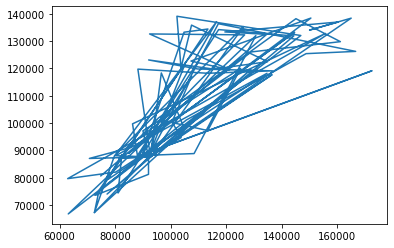

In [163]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(y_test,y_pred)
plt.show()

In [159]:
from sklearn.ensemble import RandomForestRegressor
regressor_forest = RandomForestRegressor(n_estimators =28, random_state = 786)
regressor_forest.fit(X_train, y_train)
regressor_forest.score(X_test,y_test)

0.5615481702566212

In [184]:
X.shape

(445, 9)

In [185]:
y.shape

(445,)

In [178]:
from sklearn.tree import DecisionTreeRegressor
rng = np.random.RandomState(1)

# Fit regression model
regr = DecisionTreeRegressor(random_state=0)
regr.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [181]:
from sklearn.svm import SVR
import numpy as np
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
# Fit regression model
svr = SVR().fit(X, y)
# Predict
X_test = np.arange(0.0, 5.0, 1)[:, np.newaxis]
svr.predict(X_test)

array([-0.07840308,  0.78077042,  0.81326895,  0.08638149, -0.6928019 ])

In [168]:
from sklearn import linear_model
import numpy as np
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
# Fit regression model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X,y)
X_test = np.arange(0.0, 5.0, 1)[:, np.newaxis]
lassoReg.predict(X_test)

array([ 0.78305084,  0.49957596,  0.21610108, -0.0673738 , -0.35084868])

[34.22810176]
